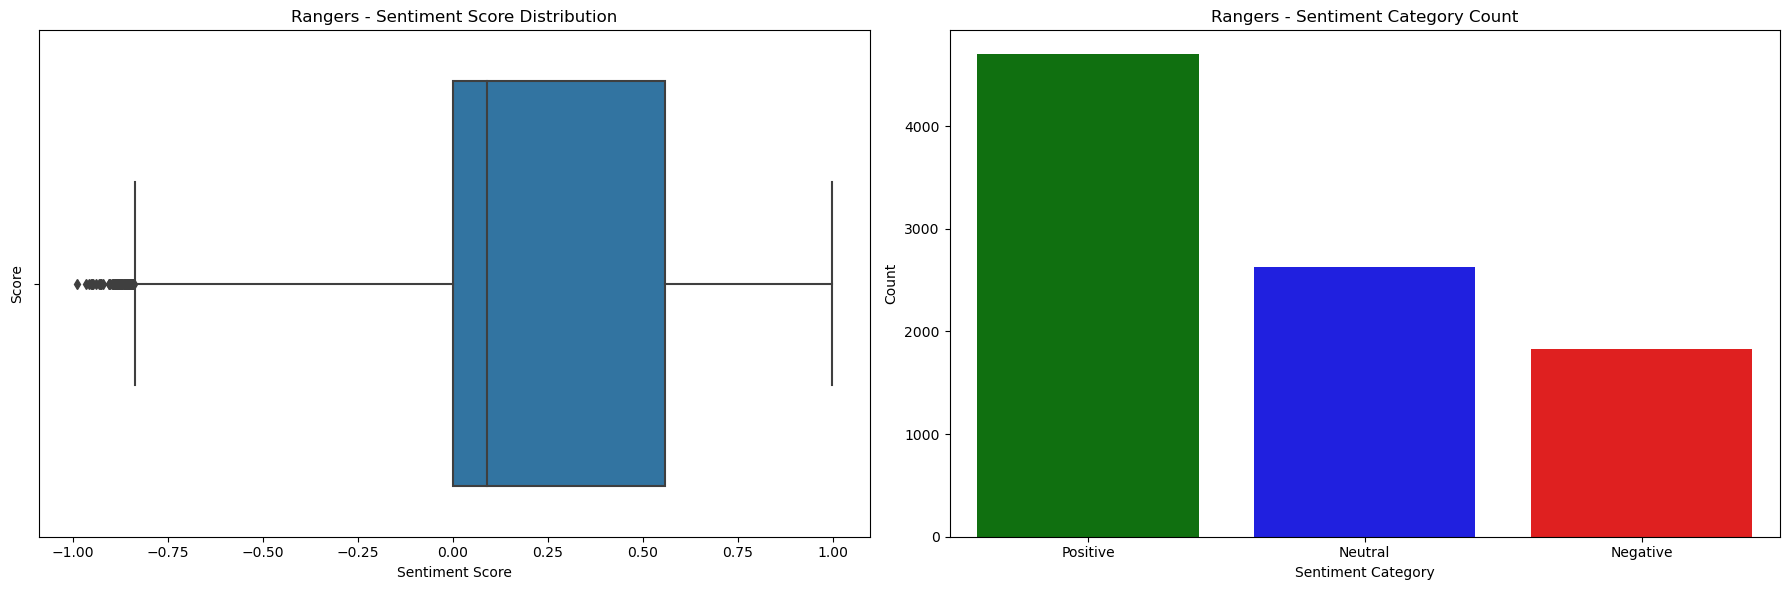

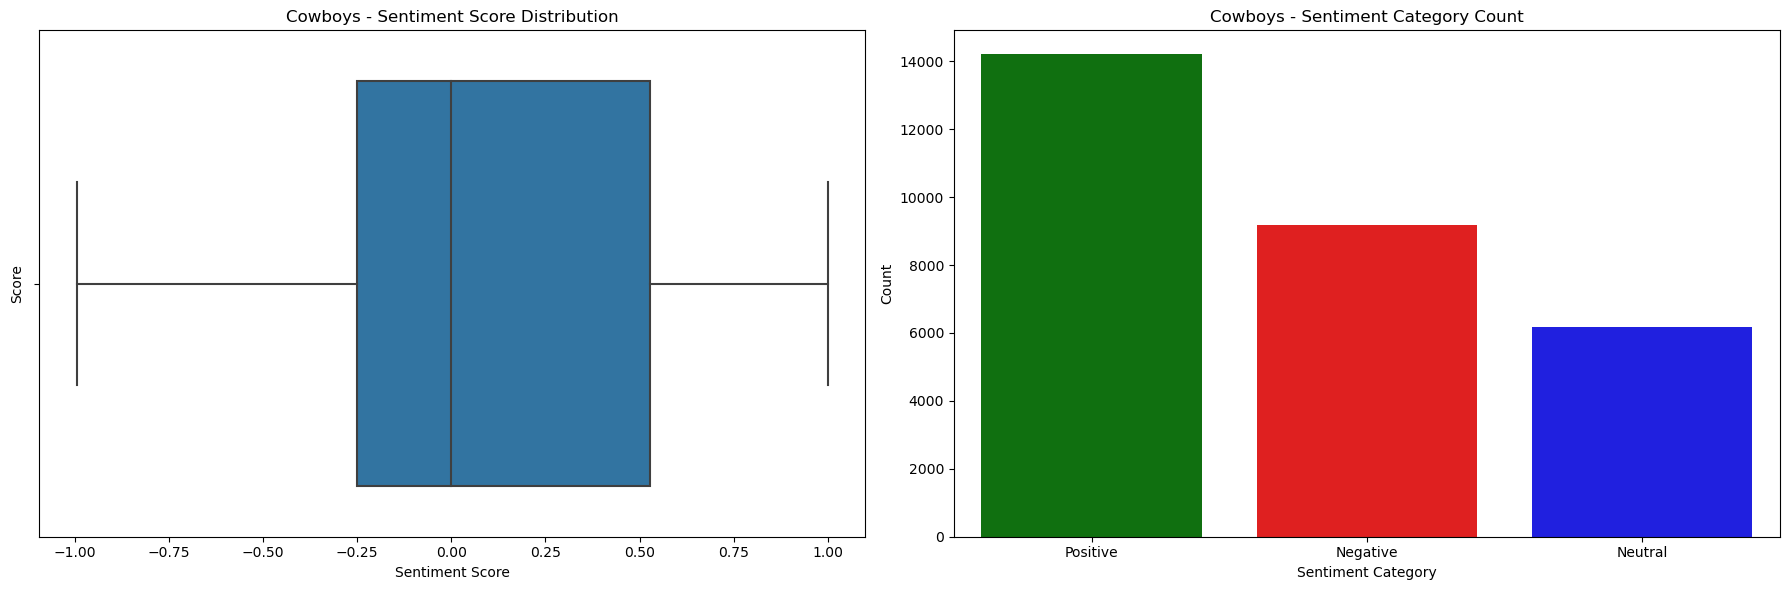

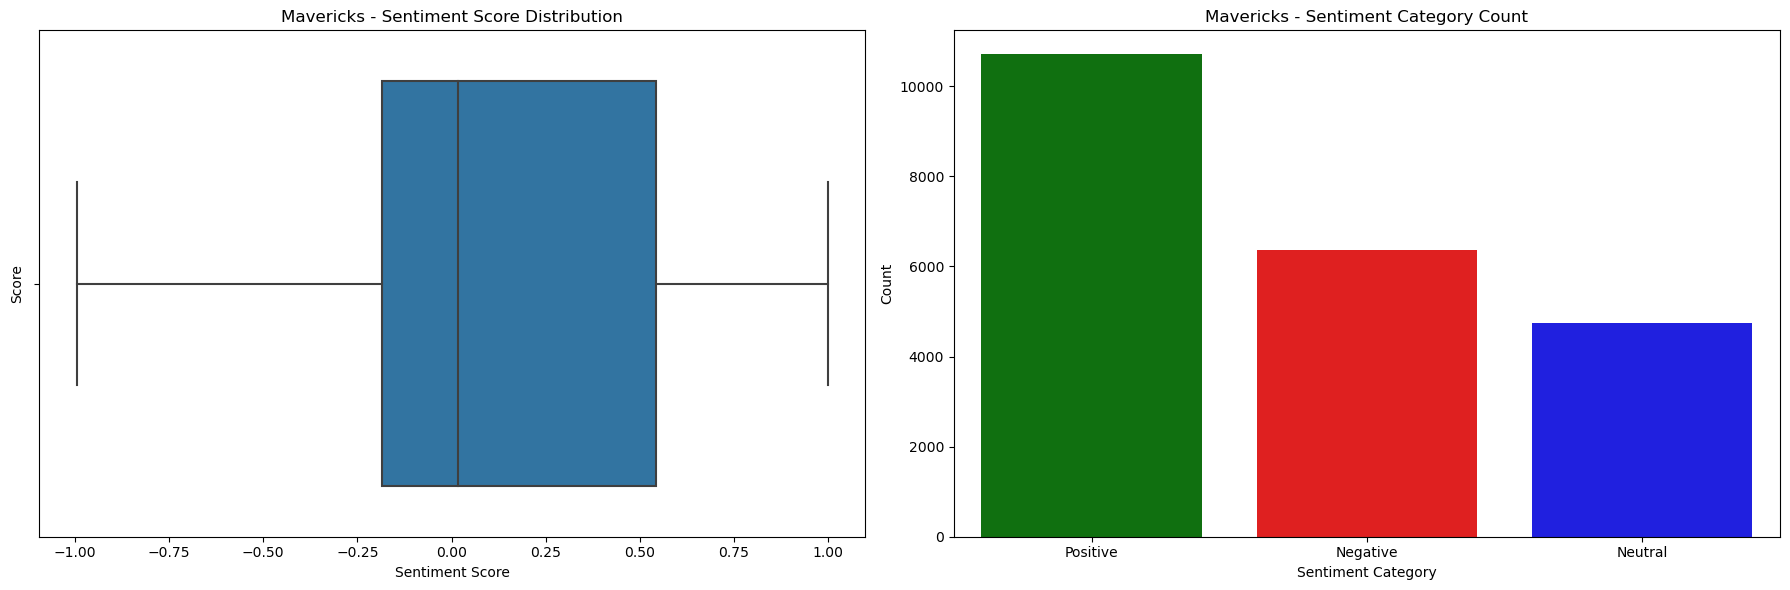

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment analysis 
def sa_plot(df_name, team_name):
    # Create figure with 2 subplots
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))

    # Box plot of sentiment scores
    sns.boxplot(x='sentiment_score', 
                data=df_name, 
                ax=ax[0])
    ax[0].set_title(f'{team_name} - Sentiment Score Distribution')
    ax[0].set_xlabel('Sentiment Score')
    ax[0].set_ylabel('Score')

    # Colors for sentiment categories
    category_colors = {"Positive": "green", "Neutral": "blue", "Negative": "red"}

    # Count plot of sentiment categories with custom colors
    sns.countplot(x='sentiment_category', 
                  data=df_name, 
                  ax=ax[1], 
                  order=df_name['sentiment_category'].value_counts().index,
                  palette=category_colors)
    ax[1].set_title(f'{team_name} - Sentiment Category Count')
    ax[1].set_xlabel('Sentiment Category')
    ax[1].set_ylabel('Count')

    # Tighten layout
    plt.tight_layout()
    plt.show()

# Load csv files
rangers_df = pd.read_csv('rangers_scores.csv')
cowboys_df = pd.read_csv('cowboys_scores.csv')
mavericks_df = pd.read_csv('mavericks_scores.csv')

# Plot sentiment analysis for each brand
sa_plot(rangers_df, 'Rangers')
sa_plot(cowboys_df, 'Cowboys')
sa_plot(mavericks_df, 'Mavericks')

In [32]:
# Print top 5 Rangers comments
rangers_df_pos = rangers_df.sort_values(by='sentiment_score', ascending=False)

# Print the top 5 comments
top_5_comments = rangers_df_pos.head(5)['processed_comment']
top_5_comments

3534    thanks man really appreciate the love and the ...
5665    its the internet and were each just one of man...
5671    you know i sort of felt like this about green ...
5685    ive been a rangers fan since when i was at tha...
5662    ha i mean i feel you but think about it this w...
Name: processed_comment, dtype: object

In [34]:
# Print bottom 5 Rangers comments
rangers_df_neg = rangers_df.sort_values(by='sentiment_score', ascending=True)

bottom_5_comments = rangers_df_neg.head(5)['processed_comment']
bottom_5_comments

7694    trying not to get too pedantic but your orgini...
7456    they are genuinely the worst and its a shame t...
1018    thank you ill be the first to say that bally s...
6767    i disagree everyone is acting like our positio...
7481    spot on problem is almost all sports retail sa...
Name: processed_comment, dtype: object

In [35]:
# Print neutral Rangers comments
rangers_df_neu = rangers_df[rangers_df['sentiment_score'] == 0]

# Print the first 5 processed comments from the filtered DataFrame
print(rangers_df_neu['processed_comment'].head(5))

0                                  minutes of pure sex
1     minutesim not going to wa oh i remember that one
2                    those garcia hrs hit harder today
6    they had robbie cano in the lineup for an earl...
8                         he signed my hat in tampa in
Name: processed_comment, dtype: object


In [ ]:
'''
Conclusion:

My hypothesis was generally correct - On the day of 2/8/24, the Rangers re-signed one of their star players in Adolis
Garcia, the Cowboys hired a new defensive coordinator, and the Mavericks traded for two new players at the trade deadline.
As a result, since I gathered the newest comments for each subreddit, I hypothesized that the fans of each team would show
positivity for the new moves that each team had made. As evidenced by the visualizations above, it can be concluded that
each team shows a generally positive view for their team at the current moment.

The VADER model was modertately effective in accurately sorting comments. It generally sorted positive vs. negative 
comments accurately, but it did not show effectiveness in determining sentiment of a large number of comments for comments 
scraped from all 3 subreddits. Therefore, definitive conclusions cannot be drawn, but general conclusions can be. To
mitigate this issue in the future, it may be a good idea to try a model that can determine context from a set of words, such
as pre-trained sentiment analysis RoBERTa model.
'''